**PROJECT DESCRIPTION:  TWITTER US AIRLINE SENTIMENT**

**DATA DESCRIPTION:**
A sentiment analysis job about the problems of each major U.S. airline.

Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

**DATASET:**
The project is from a dataset from Kaggle.

Link to the Kaggle project site:https://www.kaggle.com/crowdflower/twitter-airline-sentiment

The dataset has to be downloaded from the above Kagglewebsite.

**OBJECTIVE:**
To classify the sentiment of tweets into the positive, neutral & negative.

**METHODOLOGY:**
1.Text Based Exploratory Data Analysis.
2.Understanding of Text Pre-processing
3.Vectorization after Text-preprocessing: TF-IDF, BOW
4.Build the Classification Model
5.Tune and Evaluate the Model Performance
6.Plot the Important Features after Training the model.


In [2]:
#Install and Import necessary Libraries:
import re, string, unicodedata                          # Import Regex, string and unicodedata.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas.
import nltk                                             # Import Natural Language Tool-Kit.

nltk.download('stopwords')                              # Download Stopwords.
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [3]:
# Loading data into pandas dataframe
data = pd.read_csv("/content/Tweets.csv")

In [4]:
data.shape

(14640, 15)

In [5]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [6]:
#Check for null values
data.isnull().sum()

,0
tweet_id,0
airline_sentiment,0
airline_sentiment_confidence,0
negativereason,5462
negativereason_confidence,4118
airline,0
airline_sentiment_gold,14600
name,0
negativereason_gold,14608
retweet_count,0


**PERFORMING FEW BASIC ANALYTICAL STEPS ON DATA:**

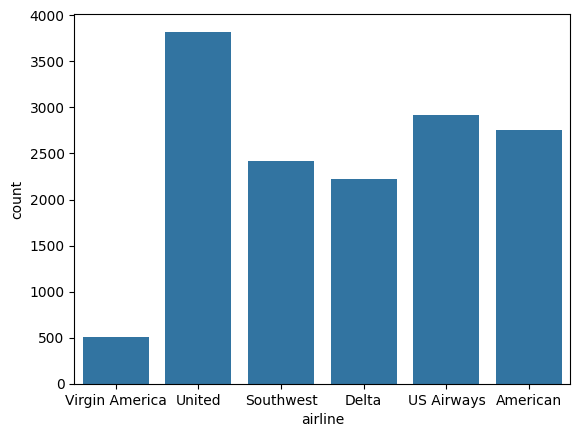

In [10]:
sns.countplot(data=data, x='airline')
plt.savefig('airline_countplot.png', dpi=300, bbox_inches='tight')

**FROM THE ABOVE PLOT, WE SEE THAT UNITED AIRLINE HAS HIGHEST NUMBER OF TWEETS FOLLOWED BY US AIRWAYS**

**DISTRIBUTION OF SENTIMENT ACROSS ALL TWEETS**

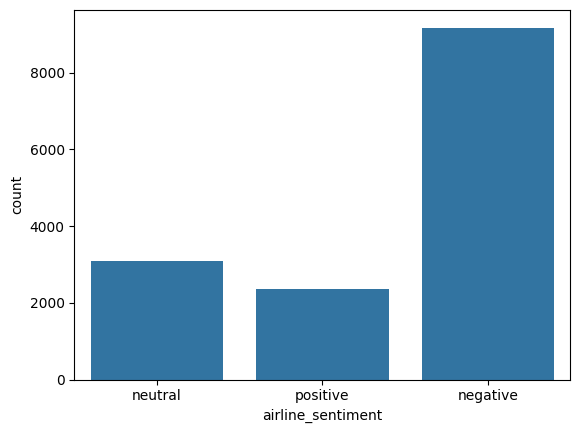

In [9]:
sns.countplot(data=data,x='airline_sentiment')
plt.savefig('airline_sentiment_countplot.png', dpi=300, bbox_inches='tight')

**Majority of the tweets are negative, followed by neutral tweets, and then the positive tweets **

**Distribution of Sentiment of tweets for each airline**

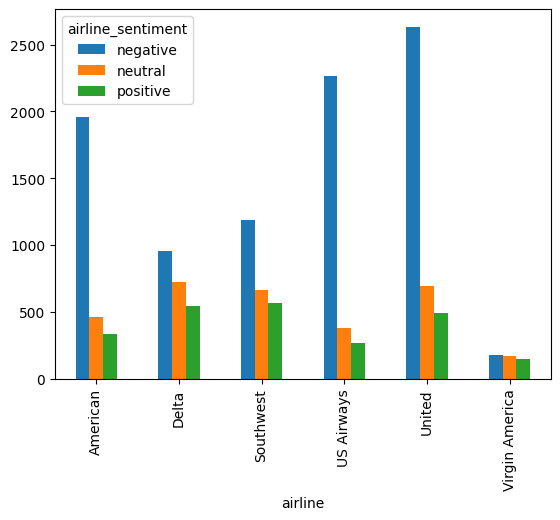

In [11]:
airline_sentiment =  data.groupby(['airline', 'airline_sentiment']).airline_sentiment.count().unstack()
airline_sentiment.plot(kind='bar')
plt.savefig('airline_sentiment_across_airway.png',dpi=300, bbox_inches='tight')

**CREATING THE ABOVE WITH PERCENTAGES:**

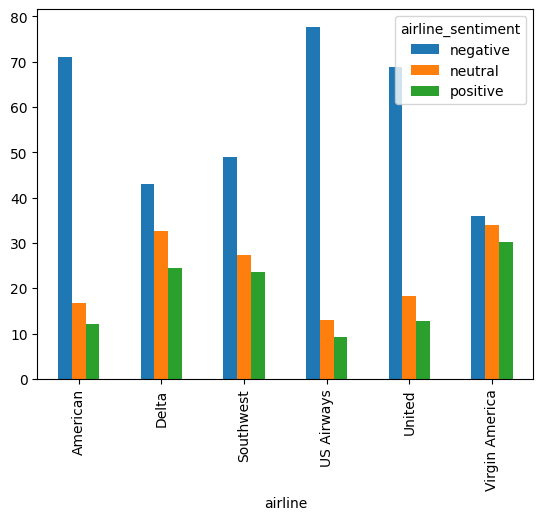

In [12]:
airline_sentiment = (data.groupby(['airline', 'airline_sentiment']).airline_sentiment.count()
                     .unstack().apply(lambda x: 100 * x / x.sum(), axis=1))
airline_sentiment.plot(kind='bar')
plt.savefig('airline_sentiment_across_airway_percentage.png',dpi=300, bbox_inches='tight')


**It is evident from the output that for almost all the airlines, the majority of the tweets are negative, followed by neutral and positive tweets. Virgin America is probably the only airline where the ratio of the three sentiments is somewhat similar.**

**PLOTTING OF ALL NEGATIVE REASONS:**

<ipython-input-13-7b268cf7ccdc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="negativereason", palette="Paired")


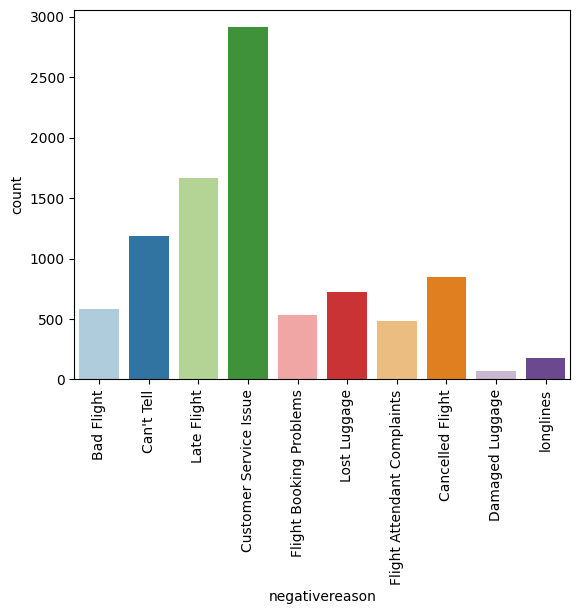

In [13]:
# Create the countplot
sns.countplot(data=data, x="negativereason", palette="Paired")
plt.savefig('Negative_reasons_countplot.png',dpi=300, bbox_inches='tight')

# Rotate the x-axis labels by 90 degrees
plt.xticks(rotation=90)


# Show the plot
plt.show()

**FROM THE ABOVE PLOT, WE CAN INFER THAT THE CUSTOMER SERVICE HAS BEEN THE MAIN ISSUE FOLLOWED BY LATER FLIGHT AND OTHERS**

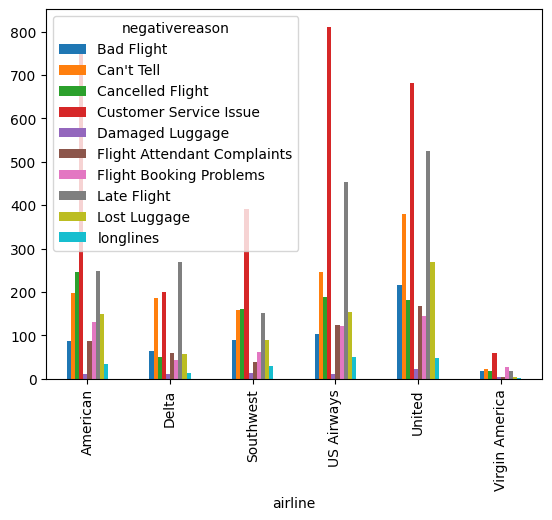

In [14]:
#Plot the negative reasons corresponding to all airlines
airline_negative = data.groupby(['airline', 'negativereason']).negativereason.count().unstack()
airline_negative.plot(kind='bar')
plt.savefig('Airlines_with_Negative_reasons.png',dpi=300, bbox_inches='tight')


**WORDCLOUD FOR NEGATIVE TWEETS:**

In [15]:
from wordcloud import WordCloud,STOPWORDS
airline_tweets=data[data['airline_sentiment']=='negative']
words = ' '.join(data['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('&')
                                and not word.startswith(':')
                                and word != 'RT'

                            ])
cleaned_word

'What said. plus you\'ve added commercials to the experience... tacky. I didn\'t today... Must mean I need to take another trip! it\'s really aggressive to blast obnoxious "entertainment" in your guests\' faces they have little recourse and it\'s a really big bad thing about it seriously would pay $30 a flight for seats that didn\'t have this playing. it\'s really the only bad thing about flying VA yes, nearly every time I fly VX this “ear worm” won’t go away Really missed a prime opportunity for Men Without Hats parody, there. Well, I didn\'t…but NOW I DO! it was amazing, and arrived an hour early. You\'re too good to me. did you know that suicide is the second leading cause of death among teens 10-24 I pretty graphics. so much better than minimal iconography. This is such a great deal! Already thinking about my 2nd trip to I haven\'t even gone on my 1st trip yet! ;p I\'m flying your #fabulous #Seductive skies again! U take all the #stress away from travel Thanks! SFO-PDX schedule is 

In [16]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

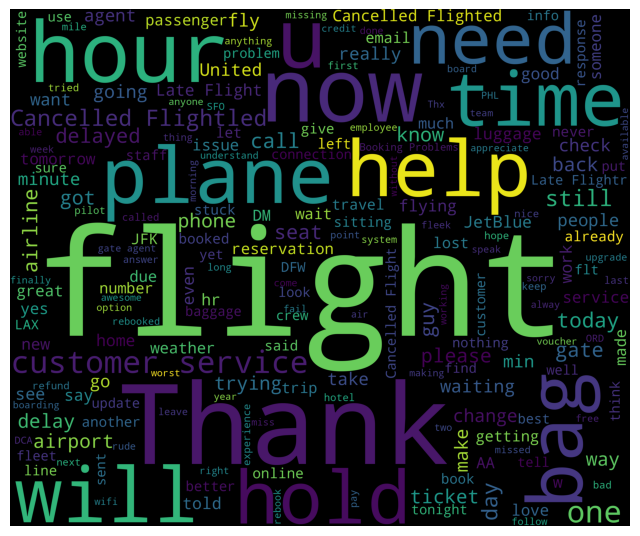

In [17]:
plt.figure(1,figsize=(8, 8))
plt.savefig('Negative_reasons_wordcloud.png',dpi=300, bbox_inches='tight')
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

**Tweets with negative sentiment are frequently involved few words like cancelled, customer, hour, flight. People might guess that customer tends to complain when they are waiting for the delayed flights.**

**WORDCLOUD FOR POSITIVE REASONS:**

In [18]:
airline_tweets=data[data['airline_sentiment']=='positive']
words = ' '.join(data['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('&')
                                and not word.startswith(':')
                                and word != 'RT'
                            ])

In [19]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

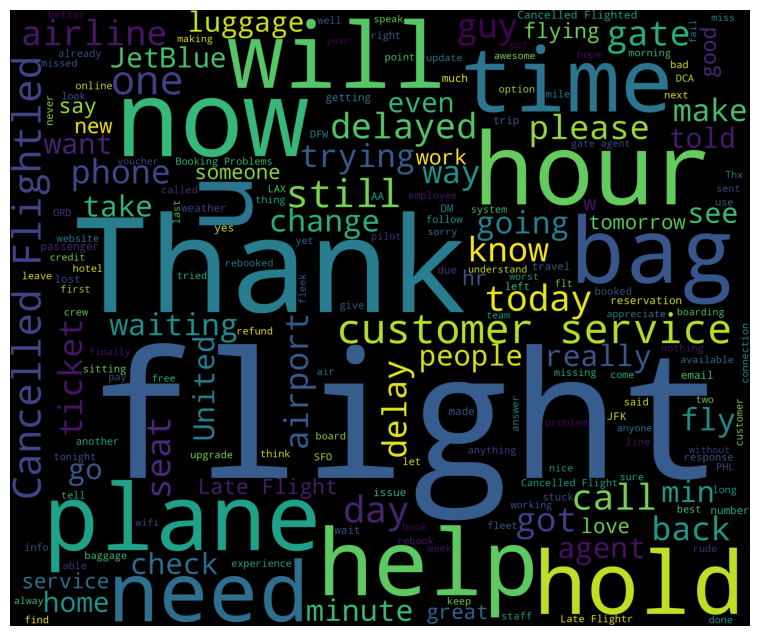

In [20]:
plt.figure(1,figsize=(12, 8))
plt.savefig('Positive_reasons_wordcloud.png',dpi=300, bbox_inches='tight')
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [21]:
data = data[['text', 'airline_sentiment']]

**DATA PRE-PROCESSING:**
1.Remove HTML Tags
2.Remove Numbers
3.Tokenization
4.Remove Stopwords
5.Lemmatization


In [22]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

data['text'] = data['text'].apply(lambda x: strip_html(x))
data.head()

<ipython-input-22-17072d845af4>:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


In [23]:
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

data['text'] = data['text'].apply(lambda x: remove_numbers(x))
data.tail()

,text,airline_sentiment
14635,@AmericanAir thank you we got on a different f...,positive
14636,@AmericanAir leaving over minutes Late Flight...,negative
14637,@AmericanAir Please bring American Airlines to...,neutral
14638,"@AmericanAir you have my money, you change my ...",negative
14639,@AmericanAir we have ppl so we need know how...,neutral


In [25]:
nltk.download('punkt_tab')
data['text'] = data.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [26]:
stopwords = stopwords.words('english')

# Set custom stop-word's list as not, couldn't etc. words matter in Sentiment, so not removing them from original data.

stopwords = list(set(stopwords))

In [27]:
lemmatizer = WordNetLemmatizer()

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def normalize(words):
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

data['text'] = data.apply(lambda row: normalize(row['text']), axis=1)
data.head()

,text,airline_sentiment
0,virginamerica dhepburn say,neutral
1,virginamerica plus add commercials experience ...,positive
2,virginamerica nt today must mean need take ano...,neutral
3,virginamerica really aggressive blast obnoxiou...,negative
4,virginamerica really big bad thing,negative


**BUILDING THE MODEL BASED ON COUNT VECTORIZER AND RANDOM FOREST CLASSIFIER**

In [28]:
# Vectorization (Convert text data to numbers).
from sklearn.feature_extraction.text import CountVectorizer

Count_vec = CountVectorizer(max_features=5000)                # Keep only 5000 features as number of features will increase the processing time.
data_features = Count_vec.fit_transform(data['text'])

data_features = data_features.toarray()                        # Convert the data features to array.

In [29]:
X = data_features

y = data.airline_sentiment

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [31]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, X, y, cv=10)))

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.7118852459016394


In [33]:
# generate accuracy of above on testing data

print(forest.score(X_test,y_test))

0.7593351548269581


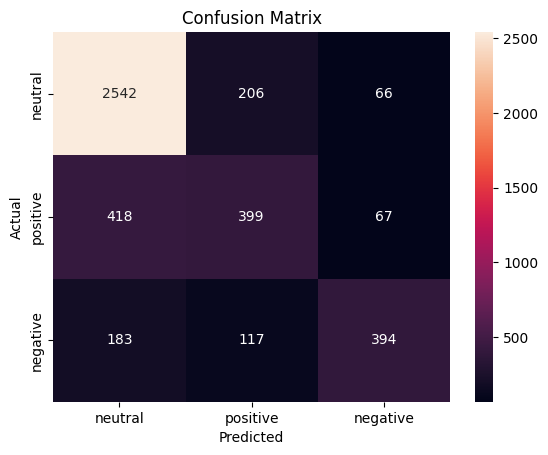

In [34]:
# prompt: generate confusion matrix for the same and add target labels

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate the confusion matrix
cm = confusion_matrix(y_test, forest.predict(X_test))

# Create a Seaborn heatmap to visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", xticklabels=data['airline_sentiment'].unique(), yticklabels=data['airline_sentiment'].unique())
plt.savefig('Confusion_matrix.png',dpi=300, bbox_inches='tight')

# Add target labels to the plot
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**WE WILL BE PERFORMING TF-IDF VECTORIZATION TECHNIQUE AND WILL CHECK THE MODEL ACCURACY:**

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorization (Convert text data to numbers).

Tfidf_vec = TfidfVectorizer(max_features=5000)  # Keep only 5000 features as number of features will increase the processing time.
data_features = Tfidf_vec.fit_transform(data['text'])

data_features = data_features.toarray()  # Convert the data features to array.
data_features.shape
data_features

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.7116120218579234
0.7604735883424408


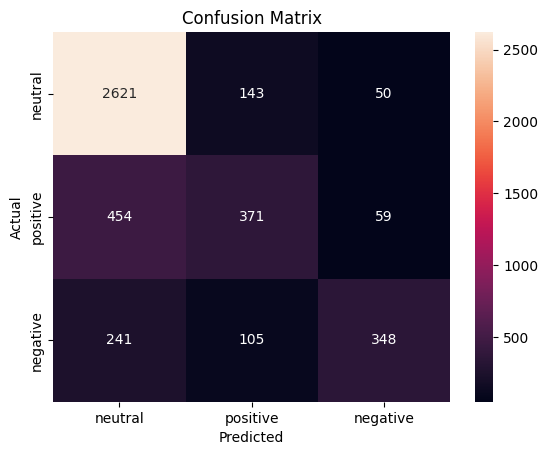

In [36]:
X = data_features

y = data.airline_sentiment

# Split data into training and testing set.


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.


forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, X, y, cv=10)))

print(forest.score(X_test, y_test))



# Generate the confusion matrix
cm = confusion_matrix(y_test, forest.predict(X_test))

# Create a Seaborn heatmap to visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", xticklabels=data['airline_sentiment'].unique(), yticklabels=data['airline_sentiment'].unique())
plt.savefig('Confusion_matrix_with_TF-IDF.png',dpi=300, bbox_inches='tight')

# Add target labels to the plot
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Using the above model to get a prediction **

In [39]:
example = [" experience was bad "]
example_features = Tfidf_vec.transform(example)
example_features = example_features.toarray()
print(forest.predict(example_features))

['negative']


**OPTIMIZATION OF PARAMETERS:**

In [40]:
# Finding optimal number of base learners using k-fold CV ->
base_ln = [x for x in range(1, 25)]

In [41]:
# K-Fold Cross - validation .
cv_scores = []
for b in base_ln:
     clf = RandomForestClassifier(n_estimators = b)
     scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
     cv_scores.append(scores.mean())

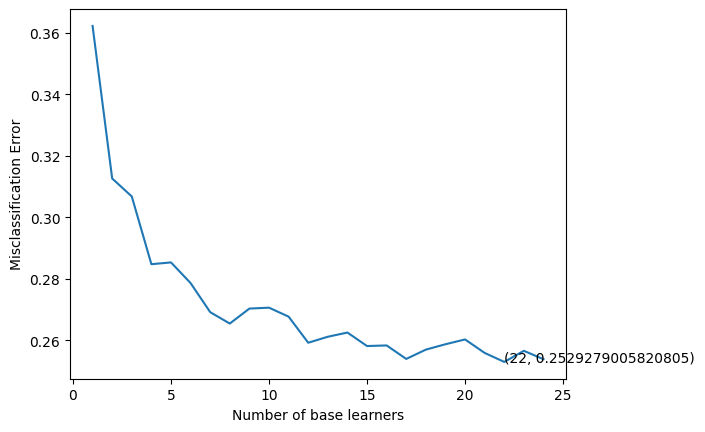

In [42]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                 #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [43]:
# Training the best model and calculating accuracy on test data .
clf = RandomForestClassifier(n_estimators = 24)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7716302367941712

In [44]:
# Predict the result for test data using the model built above.

result = forest.predict(X_test)

[[2621  143   50]
 [ 454  371   59]
 [ 241  105  348]]


<Axes: >

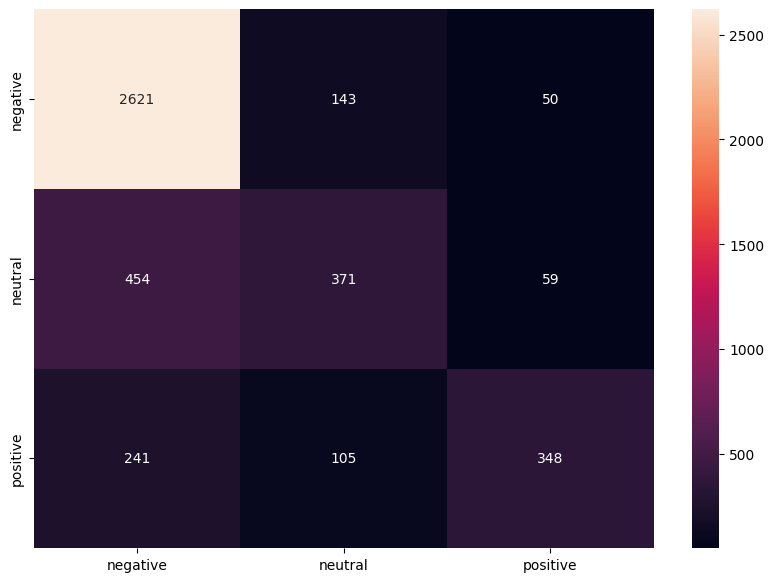

In [45]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ['negative', 'neutral', 'positive']],
                   columns = [i for i in ['negative', 'neutral', 'positive']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')